## Fractal Analysis of Reservoir Rocks
#### Fehmi Ozbayrak
#### Petroleum and Geosystems Engineering, MS

### Subsurface Machine Learning Course, The University of Texas at Austin
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering
#### Department of Geological Sciences, Jackson School of Geosciences




_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The Univeristy of Texas at Austin
##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Misael Morales, Graduate Student, The University of Texas at Austin
##### [LinkedIn](https://www.linkedin.com/in/misaelmmorales/)

### Executive Summary
Thanks to fractal characteristics of naturally generated structures, we have the opportunity of using fractal properties of capillary porous medium to infer porosity and permeability. We have measured Fractal dimension of Bentheimer Sandstone as $1.557$ and permeability as $1.61 D$, which is statistically identical with experimental values ($D_f=1.58, k=1.51\pm 0.14 D$ respectively), using box-counting method. We learned that fractal analysis is incredibly promising, and we also learned that there is a certain correlation between fractal dimension and porosity. We recommend to use fractal analysis with multiple 2D images from core to avoid sampling bias, although the standard deviation is low; and we recommend using fractal analysis on different types of sandstones to come up with a general formula for tortuosity fractal dimension, if one is interested.

### Introduction

Fractals are in the most basic sense, infinitely repeating patterns that looks very similar (if not the same) to the original shape no matter how much you _zoom in_. The important aspect of the fractals is that [_self-affine_](#glossary_self_affine) structures that are showing fractal-like behavior, appears everywhere in nature. We are saying "fractal-like" because a fractal is an "ideal" object where the pattern is repeating infinitely, which is not possible in real life applications. However, these structures nonetheless shares similar characteristics that of fractals, which we are going to use in this workflow.

<center><img src="https://raw.githubusercontent.com/fozba/fractal_analysis_bentheimer_sandstone/main/final/explanatory_images/barnsley.png"/></center>
<center>Fig 1: Barnsley Fern, a fractal, (left) and a real fern (right). Note that even though they are very similar, Barnsley fern is infinitely complex (you can keep zooming in a leaf and you would end up seeing more and more leaves) while the fern is not infinitely complex. That is why, we don't say that the fern is a fractal, we rather say fern shows fractal properties or the fern is fractal-like. Retrieved from <a href='https://drawingwithnumbers.artisart.org/wp-content/uploads/2013/12/Fern_Fractal_2M-624x414.png'>drawingwithnumbers.artisart.org</a></center>

<br>
<br>

Most of the structures with **rough surfaces** (Any n-dimensional rough surface) that are created by **natural** means tend to have fractal properties. That is why, fractal methods for image generation are used to generate synthetic images of fractal-like structures, such as clouds, mountains, shores etc. More information can be found online, or in the book by [Mandelbrot (1977)](#references_mandelbrot_1977).

<br>
<br>

<center><img src="https://raw.githubusercontent.com/fozba/fractal_analysis_bentheimer_sandstone/main/final/explanatory_images/fractal_panorama.gif"/></center>
<center>Fig 2: Mountains generated using fractals (specifically, fractional Brownian motion) <a href='#references_voss_1989'>(Voss, 1989)</a>. Retrieved from <a href='https://users.math.yale.edu/public_html/People/frame/Fractals/Panorama/Art/MountainsSim/Classical/VossMountain2p5.gif'>Yale Math Webpage</a></center>

<br>
<br>

Recent studies ([Bayles et. al. (1989)](#references_baylesetal_1989); [Pape et. al. (2000)](#references_papeetal_2000)) show that most of the porous matrix that have complex and random microstructures are good candidates for fractal analysis and fractal geometry applies to those structures, especially the sandstones that formed by diagenesis. Using the fractal analysis, we can interpret the fractal geometry of a porous medium and infer its characteristics.

In summary, this workflow aims to obtain the permeability of a naturally-generated sandstone by measuring **pore area fractal dimension** and **tortuosity fractal dimension**, which are two parameters introduced with fractal geometry. The parameters will be explained, along with the questions; how they are measured, what they mean physically and what is the usage of them in subsurface characterization. This way, the we demonstrate an alternative method of *obtaining permeability from porosity*, to the well-known Kozeny-Carman equation.

### Import Packages

We start by importing numpy and pyplot. Other than these two packages, we will use [PoreSpy](#references_gosticketal_2019), a package that consists of tools to work with porous medium. This package will introduce us the *box counting* function which we will use to calculate fractal dimension from 2D images, and the *Sierpinski carpet generation* function, which we will use to generate [Sierpinski Carpets](#glossary_sierpinski_carpet) to benchmark our fractal dimension calculator and to use it as a model for subsurface.

In [1]:
#IMPORTING DEPENDENCIES
import numpy as np #numPy for array operations
import matplotlib.pyplot as plt #pyplot for image interaction/reconstruction
import porespy as ps #PoreSpy for fractal dimension calculation
import glob #glob for importing all images from a given file
import PIL #PIL for uploading images from URLs, as it is necessary for the Homework
import urllib #urllib for the same reason as PIL
from tqdm.notebook import tqdm as tqdm #tqdm as it is a dependency for PoreSpy

%matplotlib inline

### Functions

We will use the following functions in the workflow:

- **fractal_dimension_from_image**: Calculates the fractal dimension from given image. Given image first converted to a grayscale image array if not given converted. That is, the image is converted to $mxn$ array where $m$ is the height in pixels and $n$ is the width in pixels, with minimum value of $0$ and maximum value of $255$ (0 - black and 255 - white). Then, user defines a threshold between $0-255$ to binary transform the image as follows: Each pixel's value is checked. If it is greater than the threshold (lighter than the threshold), then it is not pore area, since we expect pore area to be darker, therefore, it is set as 0, meaning it is NOT a pore pixel (if we expect pore area to be lighter in the given image, we can set darker=False so that the function does the opposite process). Otherwise (if the checked pixel is darker than threshold, it is set as 1, meaning it is a pore pixel. After this binary transformation, fractal dimension is measured with the standard box counting method, provided by PoreSpy package.

- **fractal_dimension_from_array**: Same as fractal_dimension_from_image, but takes the image array as input instead of image file.

- **get_perm**: Calculates permeability from porosity, pore area fractal dimension and tortuosity fractal dimension as suggested by [Xu et. al(2008)](#references_xuetal_2008)

In [2]:
def fractal_dimension_from_image(imagefile, threshold=0.0, grayscale=True, darker=True, avg_porosity=True, show_stats=True, url=False):
    '''function to find fractal dimension of a 2-D image (grayscale default).
    
    parameters
    %param imagefile: str: name of the image file.
    %param threshold: float: threshold to convert image to binary. User can decide as default, if it is not specified (left as 0).
    %param grayscale: bool: grayscale option. user should set it to False if the provided image is an RGB image.
    %param darker: bool: color of area (since this function measures pore area fractal dimension) is darker than color of solids. true as default for majority of images
    %param avg_porosity: bool: if true, function also returns the calculated average porosity. It is calculated by taking the 1's of the binary image array as pores and 0's as solids with zero porosity.
    %param show_stats: bool: if true, function prints the statistics of pixels
    %param url: bool: if true, image will be retrieved from an URL. For uploading .ipynb only to Canvas (HOMEWORK PURPOSES). Default is false
        
    returns
    %param image.mean(): float: average porosity calculated as given above
    %param fractal_dimension: float: fractal dimension. Result is only reliable when dE-1<fractal dimension<dE, where dE is the Euclidean dimension of the given image.
    '''
    
    if(url):
        image_init = np.array(PIL.Image.open(urllib.request.urlopen(url))) # Initializing the image
    
    else:
        image_init = plt.imread(imagefile)
    
    if(not grayscale): # Converting the image to grayscale if grayscale option is False
        image_init = np.dot(image_init[...,:3], [0.2989, 0.5870, 0.1140])
        
    if(show_stats):
        # After we initialize the image, we display the statistics of the pixels for user to determine a good threshold
        print(f'IMAGE PROPERTIES OF {imagefile}\n')
        print(f'Max:{image_init.max()}')
        print(f'Min:{image_init.min()}')
        print(f'Mean:{image_init.mean()}')
        print(f'Stdev:{np.std(image_init)}')
        print(image_init)
        
    # If the threshold is not given by user as an argument (which is the default case to find threshold by eye):
    if(not threshold):
        proceed = 'n'
        while(proceed=='n'):
            threshold = float(input("Enter a threshold value:\t"))
            image = np.where(image_init<threshold, darker, not darker)
            plt.imshow(image, cmap='inferno')
            plt.colorbar()
            plt.show()
            print(f'Avg. Porosity: {image.mean()}')
            proceed = input("Proceed?(y/n)")
    
    plt.close('all') # Close all the opened plots that are used to determine the threshold
    
    image = np.where(image_init<threshold, darker, not darker) #running once again to verify the case for given thresholds
    
    data = ps.metrics.boxcount(image) # Using boxcounting method from PoreSpy package
    
    # The slope of box counting method results should be calculated for fractal dimension. As the papers suggest, the ideal 'zone' to calculate this slope is the interval of box length between 10^1 and 10^2
    data.edgeminidx = np.argmin(data.size[data.size>=10]) # Taking the box length that is closest to 10^1 as the 'start of the interval' for slope of fractal dimension
    data.edgemaxidx = np.argmax(data.size[data.size<=100])# Taking the box length that is closest to 10^2 as the 'end of the interval' for slope of fractal dimension
    
    #Taking the average of obtained slopes between box length of 10^1 and 10^2 to estimate fractal dimension as explained.
    fractal_dimension = np.mean(data.slope[data.edgeminidx:data.edgemaxidx+1])
    
    if(avg_porosity):
        return image.mean(), fractal_dimension
    else:
        return fractal_dimension
    
def fractal_dimension_from_array(image_init, threshold=0.0, grayscale=True, darker=True, avg_porosity=True, show_stats=True, url=False):
    '''function to find fractal dimension of an image array (values from 0 to 255 default).
    
    parameters
    %param imagefile: str: name of the image file.
    %param threshold: float: threshold to convert image to binary. User can decide as default, if it is not specified (left as 0).
    %param grayscale: bool: grayscale option. user should set it to False if the provided image is an RGB image.
    %param darker: bool: color of area (since this function measures pore area fractal dimension) is darker than color of solids. true as default for majority of images
    %param avg_porosity: bool: if true, function also returns the calculated average porosity. It is calculated by taking the 1's of the binary image array as pores and 0's as solids with zero porosity.
    %param show_stats: bool: if true, function prints the statistics of pixels
    %param url: bool: if true, image will be retrieved from an URL. For uploading .ipynb only to Canvas (HOMEWORK PURPOSES). Default is false

    returns
    %param image.mean(): float: average porosity calculated as given above
    %param fractal_dimension: float: fractal dimension. Result is only reliable when dE-1<fractal dimension<dE, where dE is the Euclidean dimension of the given image.
    '''

    
    if(not grayscale): # Converting the image to grayscale if grayscale option is False
        image_init = np.dot(image_init[...,:3], [0.2989, 0.5870, 0.1140])
        
    if(show_stats):
        # After we initialize the image, we display the statistics of the pixels for user to determine a good threshold
        print(f'IMAGE PROPERTIES OF ARRAY\n')
        print(f'Max:{image_init.max()}')
        print(f'Min:{image_init.min()}')
        print(f'Mean:{image_init.mean()}')
        print(f'Stdev:{np.std(image_init)}')
        print(image_init)
    
    # If the threshold is not given by user as an argument (which is the default case to find threshold by eye):
    if(not threshold):
        proceed = 'n'
        while(proceed=='n'):
            threshold = float(input("Enter a threshold value:\t"))
            image = np.where(image_init<threshold, darker, not darker)
            plt.imshow(image, cmap='inferno')
            plt.colorbar()
            plt.show()
            print(f'Avg. Porosity: {image.mean()}')
            proceed = input("Proceed?(y/n)")
    
    plt.close('all') # Close all the opened plots that are used to determine the threshold
    
    image = np.where(image_init<threshold, darker, not darker) #running once again to verify the case for given thresholds
    
    data = ps.metrics.boxcount(image) # Using boxcounting method from PoreSpy package
    
    # The slope of box counting method results should be calculated for fractal dimension. As the papers suggest, the ideal 'zone' to calculate this slope is the interval of box length between 10^1 and 10^2
    data.edgeminidx = np.argmin(data.size[data.size>=10]) # Taking the box length that is closest to 10^1 as the 'start of the interval' for slope of fractal dimension
    data.edgemaxidx = np.argmax(data.size[data.size<=100])# Taking the box length that is closest to 10^2 as the 'end of the interval' for slope of fractal dimension
    
    #Taking the average of obtained slopes between box length of 10^1 and 10^2 to estimate fractal dimension as explained.
    fractal_dimension = np.mean(data.slope[data.edgeminidx:data.edgemaxidx+1])
    
    if(avg_porosity):
        return image.mean(), fractal_dimension
    else:
        return fractal_dimension
    
def get_perm(por, df, dt):
    '''Obtains permeability from porosity, pore area fractal dimension and tortuosity fractal dimension, as suggested by Xu et. al. (2008)
    
    parameters
    %param por: float: porosity (between 0 and 1)
    %param df: float: pore area fractal dimension. Must be between 1 and 2 for 2D image, 2 and 3 for 3D image.
    %param dt: float: tortuosity fractal dimension. Must be between 1 and 2 for 2D image, 2 and 3 for 3D image.
    
    returns
    %param k: float: permeability (darcy)
    '''
    cf = ((np.pi*df)**((1-dt)/2))*(4*(2-df))**((1+dt)/2)/((128)*(3+dt-df))
    k = (1/(36*cf))*(por**((3-dt)/2))/(1-por)**((1-dt)/2)
    
    return k

### Load Data

The following workflow can use any 2D core images with a considerably good resolution (resolution is important to get _roughness_ of the surfaces). All CT images are sufficiently good for the workflow, and they work even better if they are already binarized. Even 3D core images could be used by minor tweaks, assuming 3D fractal dimension is greater than 2D fractal dimension exactly by one ($D_{f3D}=D_{f2D}+1$) as [Hardy et. al (1994)](#references_hardyetal_1994) suggests.

This workflow will operate with 2D core images of Bentheimer Sandstone, from [Neumann et. al (2020)](#references_neumannetal_2020). Note that for the sandstone characteristics, the attached paper of the dataset provides measurements that are deviating from other papers and from this workflow's results. That is why, we will use [Usman et. al. (2019)](#references_usmanetal_2019), [Peksa et. al. (2015)](#references_peksaetal_2015) and an [informative web page](https://kocurekindustries.com/our-products/bentheimer-sandstone) about Bentheimer Sandstone for the verification of the results.

We will work with the following features:

* **porosity** - fraction of rock void in units of percentage
* **permeability** - ability of a fluid to flow through the rock in Darcy
* **pore area fractal dimension** - fractal dimension with pore area has taken as a collection of surfaces in given spatial setting
* **tortuosity fractal dimension** - fractal dimension with pore channels has taken as a collection of surfaces in given spatial setting. measure of tortuosity since tortuosity also exhibits fractal behavior

We start by assigning the file name to a variable:
```python
imagefilename = 'Bentheimer_2d25um_binary.raw.jpg' # Assigning file name to a variable for cleaner code
```

### Fractal Core Image Analsis

A short summary as a _blueprint_ form is given as below:

<img src="https://raw.githubusercontent.com/fozba/fractal_analysis_bentheimer_sandstone/main/final/other_images/workflow.jpg"/>

### 0. (OPTIONAL) Calibrate Fractal Dimension Measuring Tool

Since fractal dimensions are numbers with almost no way of verifying by just checking them, we should first make sure that our fractal dimension measuring tool works properly.

In this workflow, this is achieved by testing several "benchmark" fractals with our tool, of which we know the fractal dimension.

In [3]:
# Sierpinski triangle with fractal dimension of 1.585
benchmark_1 = np.array(PIL.Image.open(urllib.request.urlopen('https://raw.githubusercontent.com/fozba/fractal_analysis_bentheimer_sandstone/main/final/benchmark_images/sierpinski.jpg')))
# Koch Curve with fractal dimension of 1.26
benchmark_2 = np.array(PIL.Image.open(urllib.request.urlopen('https://raw.githubusercontent.com/fozba/fractal_analysis_bentheimer_sandstone/main/final/benchmark_images/koch_curve.jpg')))
# Sierpinski carpet with 7 iterations, with fractal dimension ~ 1.8928 , from PoreSpy
benchmark_3 = ps.generators.sierpinski_foam(4, 7) * 255 

# I entered the threshold since I already knew/calculated them. You can remove threshold variable to decide it yourself iteratively.
df_sierpinski_triangle = fractal_dimension_from_array(benchmark_1, threshold=200, grayscale=False, darker=False, avg_porosity=False, show_stats=False, url=True)
df_koch = fractal_dimension_from_array(benchmark_2, threshold=200, grayscale=False, darker=False, avg_porosity=False, show_stats=False, url=True)
df_sierpinski_carpet = fractal_dimension_from_array(benchmark_3, threshold=200, avg_porosity=False, show_stats=False)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [4]:
print(f'Df of Sierpinski Triangle:\t{df_sierpinski_triangle}')
print(f'Df of Koch Curve:\t\t{df_koch}')
print(f'Df of Sierpinski Carpet:\t{df_sierpinski_carpet}')

Df of Sierpinski Triangle:	1.5714896923517987
Df of Koch Curve:		1.295344245007011
Df of Sierpinski Carpet:	1.8714244355110476


The values are very accurate. We can proceed with this fractal dimension measuring tool.

### 1. Estimate Fractal Dimension

We estimate fractal dimension by measuring the fractal dimension of image, using box-counting method. We will first display the result explicitly for 1 image, and do the same calculation for 30 images to see some statistics.

  0%|          | 0/10 [00:00<?, ?it/s]

Text(600, 850, 'Df = 1.572')

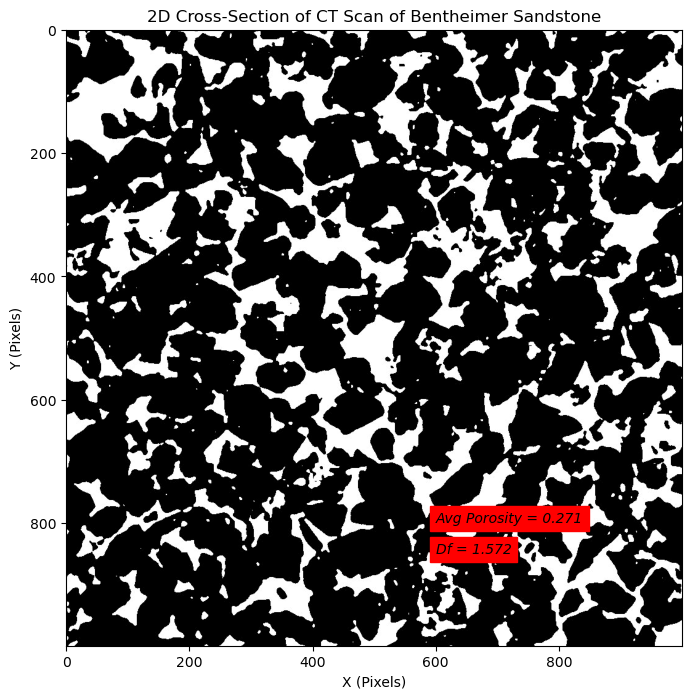

In [5]:
#For one image
test_image = np.array(PIL.Image.open(urllib.request.urlopen('https://raw.githubusercontent.com/fozba/fractal_analysis_bentheimer_sandstone/main/final/bentheimer_images/Bentheimer_2d25um_binary.raw.jpg')))
por, df = fractal_dimension_from_array(test_image, threshold=200, grayscale=True, show_stats=False) # Measuring fD and also the average porosity obtained from the image
fig, ax = plt.subplots(figsize=(18,8))
ax.imshow(test_image, cmap='binary')
ax.set_title('2D Cross-Section of CT Scan of Bentheimer Sandstone')
ax.set_xlabel('X (Pixels)')
ax.set_ylabel('Y (Pixels)')
ax.text(600, 800, 'Avg Porosity = ' + str(round(por,3)), backgroundcolor='red', fontsize=10, fontstyle='oblique')
ax.text(600, 850, 'Df = ' + str(round(df, 3)), backgroundcolor='red', fontsize=10, fontstyle='oblique')

In [6]:
# For multiple images
por_list = [] # Creating empty porosity list to obtained porosities
df_list = [] # Creating empty Df list to store Dfs
#imagenames = glob.glob('https://raw.githubusercontent.com/fozba/fractal_analysis_bentheimer_sandstone/main/final/bentheimer_images/GIF*') # We import all images start with the name "GIF" --NOT WORKING FOR URL
imagenums = list(range(600,651)) # We create a list of numbers of all images in the folder for handling URL, this may take a minute due to loading images from web.
for imagenum in imagenums:
    imageurl = 'https://raw.githubusercontent.com/fozba/fractal_analysis_bentheimer_sandstone/main/final/bentheimer_images/GIF_Frame' + str(imagenum) + '.jpg'
    imagearr = np.array(PIL.Image.open(urllib.request.urlopen(imageurl)))
    por, df = fractal_dimension_from_array(imagearr, threshold=200, grayscale=False, show_stats=False) # Measuring fD and also the average porosity obtained from the image
    por_list.append(por)
    df_list.append(df)

# Converting values to numpy arrays for easier handling
por_list = np.array(por_list)
df_list = np.array(df_list)

# Calculating the average of the values for calculations further
por = round(por_list.mean(), 3)
df = round(df_list.mean(), 3)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

We will plot the histograms of the results, and we will also plot porosity versus fractal dimension to determine if there is a correlation. Because, the papers suggest that there is a correlation.

Text(0, 0.5, 'Frequency')

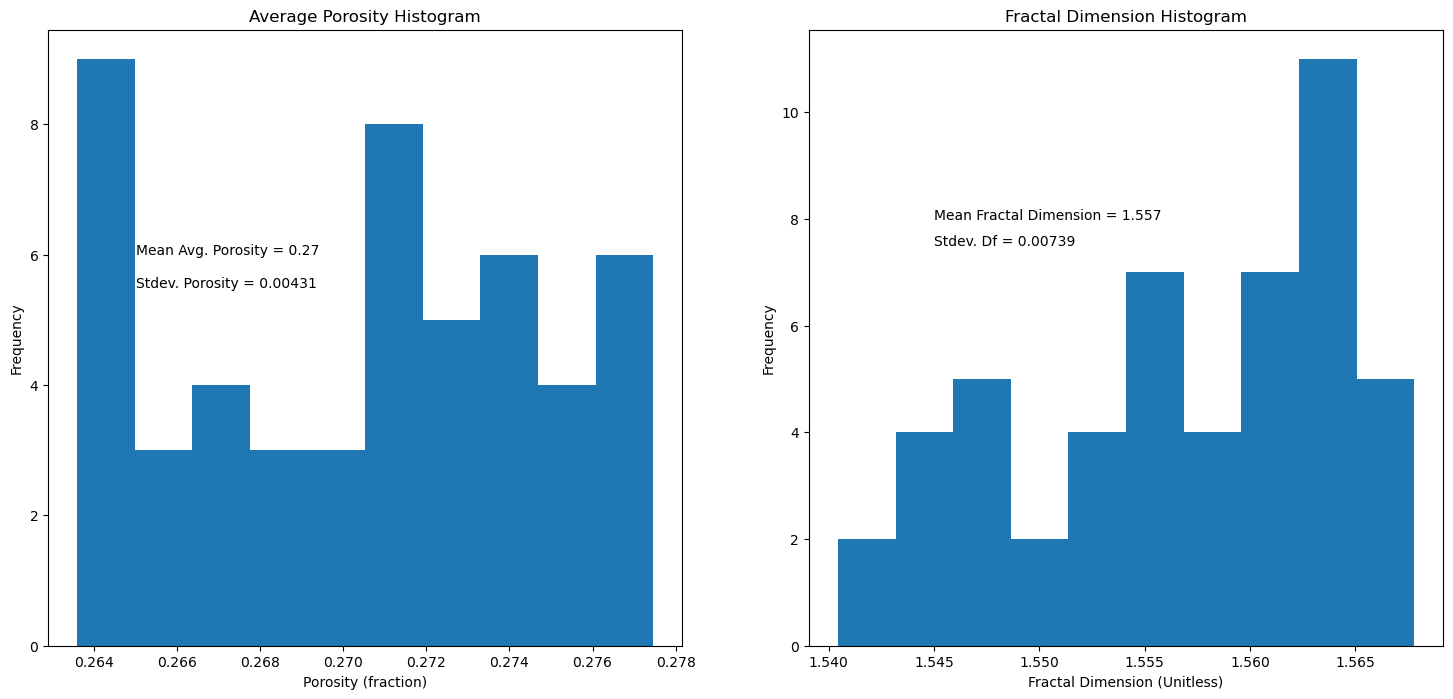

In [7]:
#Plotting the results as histograms
fig, axs = plt.subplots(1,2, figsize=(18, 8))
axs[0].hist(por_list)
axs[0].text(0.2650, 6, 'Mean Avg. Porosity = ' + str(por))
axs[0].text(0.2650, 5.5, 'Stdev. Porosity = ' + str(round(np.std(por_list), 5)))
axs[0].set_title('Average Porosity Histogram')
axs[0].set_xlabel('Porosity (fraction)')
axs[0].set_ylabel('Frequency')
axs[1].hist(df_list)
axs[1].text(1.545, 8, 'Mean Fractal Dimension = ' + str(df))
axs[1].text(1.545, 7.5, 'Stdev. Df = ' + str(round(np.std(df_list), 5)))
axs[1].set_title('Fractal Dimension Histogram')
axs[1].set_xlabel('Fractal Dimension (Unitless)')
axs[1].set_ylabel('Frequency')

Text(0.274, 1.545, 'Correlation coefficient = 0.85')

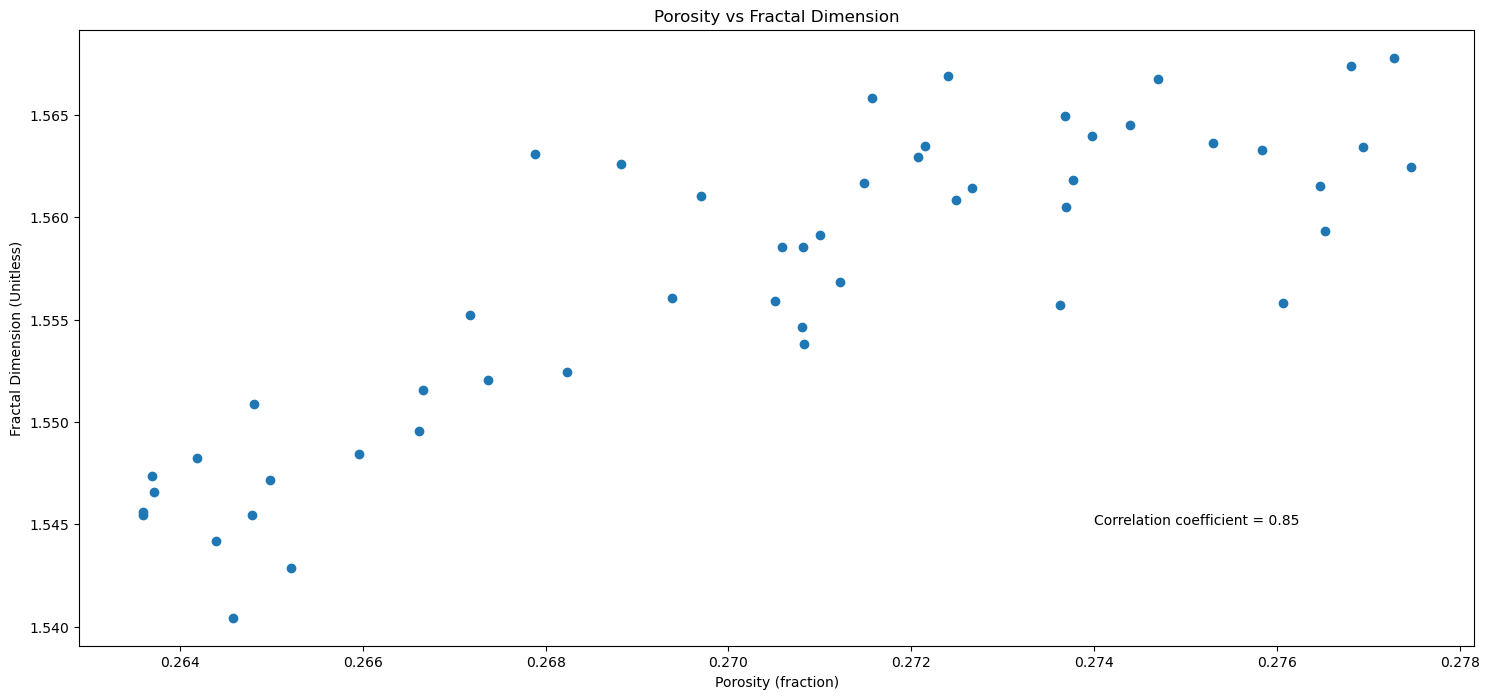

In [8]:
fig, ax = plt.subplots(figsize=(18,8))
ax.scatter(por_list, df_list)
ax.set_title('Porosity vs Fractal Dimension')
ax.set_xlabel('Porosity (fraction)')
ax.set_ylabel('Fractal Dimension (Unitless)')
ax.text(0.274, 1.545, 'Correlation coefficient = ' + str(round(np.corrcoef(por_list, df_list)[0][1], 3)))

The fractal dimension is calculated as $1.557$ and $\phi_{avg}$ is calculated as $27.0\%$. We expected to see a Gaussian distribution, which is somewhat true for both of the datasets. The reason for not seeing a full Gaussian distribution is the fact that we are only using 50 images. More images will produce a better histogram. This value almost exactly the same as the fractal dimension mentioned in [Usman et. al. (2019)](#references_usmanetal_2019). Last, the porosity vs. $D_f$ plot indicates a high correlation, with the calculated correlation coefficient of $0.85$. Therefore, we will proceed with this value as it seems valid.

### 2. Calculate Tortuosity Fractal Dimension

Tortuosity Fractal dimension is calculated by drawing the capillary curves one by one, and measuring each curve's fractal dimension as above, and then averaging the obtained numbers. This is possible by hand-drawing the curves, or automatically generating those curves from the given images by image processing. However, those are not within the scope of the work. That is why, we will use the already-calculated tortuosity fractal dimension for Bentheimer Sandstone.

The tortuosity fractal dimension in [Usman et. al. (2019)](#references_usmanetal_2019) is given as $1.14$.

In [9]:
dt = 1.14

### 3. Calculate Permeability

The analytical formula for permeability involving pore area and tortuosity fractal dimensions is given by [Xu et. al. (2008)](#references_xuetal_2008) as:
$$k=\frac{1}{36C_f}\frac{\phi^{(3-D_T)/2}}{(1-\phi)^{(1-D_T)/2}}$$
where
$C_f=\frac{(\pi D_f)^{(1-D_T)/2}[4(2-D_f)]^{(1+D_T)/2}}{128(3+D_T-D_f)}$
where $D_f$ is pore area fractal dimension and $D_T$ is tortuosity fractal dimension. The function is already implemented in 
```python
get_perm()
```
function

In [10]:
k = get_perm(por, df, dt)
print(f'Permeability = {k} Darcy')

Permeability = 1.6107839444821872 Darcy


which is statistically identical with the latest results about the Bentheimer Sandstone as discussed by [Peksa et. al. (2015)](#references_peksaetal_2015) of $1.53\pm 0.14 D$ and within the average permeability limit for Bentheimer Sandstone as suggested by [Kocurek Industries](https://kocurekindustries.com/our-products/bentheimer-sandstone)

### Results

Fractal analysis shows that Bentheimer Sandstone has a pore area fractal dimension of $D_f=1.572$ which is very consistent with previous studies mentioned. In addition, using the same tortuosity fractal dimension of $D_T=1.14$ as given in the studies, we obtain a permeability of $1.61$ Darcy, which is remarkably close to $1.53\pm 0.14 Darcy$ mentioned in [Peksa et. al. (2015)](#references_peksaetal_2015). This shows the quality and efficiency of fractal analysis in identifying the characteristics of Bentheimer Sandstones, and possibly other sandstones.
### Parting Comment

I am Fehmi Ozbayrak and I am a big fan of non-linear dynamics and chaos, and would like to seize opportunities to work on non-linear dynamics in reservoir engineering, especially with computational approaches. Feel free to contact me at [My Twitter](https://twitter.com/fozba1)

### Glossary 

<span id='glossary_self_affine'>Self-affine: The condition of a fractal whose pieces are scaled by different amounts in the x and y directions, so that self-similarity becomes apparent only after an anisotropic transformation.</span>

<span id='glossary_sierpinski_carpet'>Sierpinski Carpet: The construction of the Sierpiński carpet begins with a square. The square is cut into 9 congruent subsquares in a 3-by-3 grid, and the central subsquare is removed. The same procedure is then applied recursively to the remaining 8 subsquares, ad infinitum. </span>

### References

<span id='references_voss_1989'>Voss, R. F. (1989). Random fractals: Self-affinity in noise, music, mountains, and clouds. Physica D: Nonlinear Phenomena, 38(1-3), 362-371.</span>

<span id='references_baylesetal_1989'>Bayles, G. A., Klinzing, G. E., & Chiang, S. H. (1989). Fractal mathematics applied to flow in porous systems. Particle & Particle Systems Characterization, 6(1‐4), 168-175.</span>

<span id='references_papeetal_2000'>Pape H, Clauser C, Iffland J. Variation of permeability with porosity in sandstone diagenesis interpreted with a fractal pore space model. Pure Appl Geophys 2000;157:603–19.</span>

<span id='references_hardyetal_1994'>Hardy, H. H., & Beier, R. A. (1994). Fractals in reservoir engineering. World Scientific.</span>

<span id='references_gosticketal_2019'>Gostick J, Khan ZA, Tranter TG, Kok MDR, Agnaou M, Sadeghi MA, Jervis R. PoreSpy: A Python Toolkit for Quantitative Analysis of Porous Media Images. Journal of Open Source Software, 2019. doi:10.21105/joss.01296</span>

<span id='references_xuetal_2008'>Xu, P., & Yu, B. (2008). Developing a new form of permeability and Kozeny–Carman constant for homogeneous porous media by means of fractal geometry. Advances in water resources, 31(1), 74-81.</span>

<span id='references_neumannetal_2020'>Neumann, R., Andreeta, M., & Lucas-Oliveira, E. (2020, October 8). 11 Sandstones: raw, filtered and segmented data. Retrieved November 14, 2022, from www.digitalrocksportal.org </span>

<span id='references_usmanetal_2019'>Usman, A. H., &amp; Zhou, Y. (2019). Image based fractal characterization and modeling of multiphase flow in sandstone formation . International Journal of Latest Engineering Research and Applications, Pp 34 - 45, Vol 04 - No. 04, 2019, 04(04), 34–45. </span>

<span id='references_peksaetal_2015'>Peksa, A. E., Wolf, K. H. A., & Zitha, P. L. (2015). Bentheimer sandstone revisited for experimental purposes. Marine and Petroleum Geology, 67, 701-719.</span>

<span id='references_mandelbrot_1977'>Mandelbrot, B. (1977). Fractals. San Francisco: Freeman.</span>